# CNMF-E demo pipeline: Intro 
This notebook demonstrates how to use Caiman for processing 1p microendoscopic data. It shows how to use Caiman for the following steps:

![cnmfe pipeline full](https://raw.githubusercontent.com/EricThomson/image_sandbox/main/images/full_cnmfe_workflow.jpg)

1. Apply the NoRMCorre (nonrigid motion correction) algorithm for motion correction.
2. Apply the constrained nonnegative matrix factorization endoscopic (CNMF-E) source separation algorithm to extract an initial estimate of neuronal spatial footprint and calcium traces.
3. Apply quality control metrics to evaluate the initial estimates, and narrow down to the final set of estimates.

Some tools for visualization of movies and results are also included. 

> This demo follows a similar pattern to the CNMF demo in `demo_pipeline.ipynb`. It includes less explanation except where there are important differences. If you want to get a more explanation-heavy picture of the fundamentals, we suggest starting with `demo_pipeline.ipynb`.

### It is recommended to run cells separately, depending on what you want to do, rather than running them in sequential order. They do not have to all be run

# Imports and general setup

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
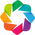

Loading BokehJS ...

In [1]:
import bokeh.plotting as bpl
import cv2
import glob
import holoviews as hv
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import psutil

import caiman as cm
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import params as params
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.utils.visualization import view_quilt

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
        # get_ipython().run_line_magic('matplotlib', 'qt')  #uncomment to run in qt mode
except NameError:
    pass

try:
    cv2.setNumThreads(0)
except:
    pass

bpl.output_notebook()
hv.notebook_extension('bokeh')

from pynwb import NWBHDF5IO
from decode_lab_code.calcium_imaging import calcium_imaging_utils

import tifffile
from ipywidgets import IntSlider, VBox
import fastplotlib as fpl

from caiman.motion_correction import high_pass_filter_space
from caiman.summary_images import correlation_pnr


Set up logger and environment variables

In [ ]:
# set up logging
logging.basicConfig(format="{asctime} - {levelname} - [{filename} {funcName}() {lineno}] - pid {process} - {message}",
                    filename=None, 
                    level=logging.WARNING, style="{") #logging level can be DEBUG, INFO, WARNING, ERROR, CRITICAL

# set env variables in case they weren't already set
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

# Select file(s) to be processed

Lets identify all vidoes recorded from this recording session

In [ ]:
# define movie paths
fname = '/Users/js0403/miniscope/122A_session2_nwbfile/122A_session2.tif'
fr = 30

# Load and visualize raw data
We visualize using the built-in movie object, which is described in detail in `demo_pipeline.ipynb`. In addition to neural activity, you can also see blood flow in the movie.

In [ ]:
# press q to close
#movie_orig = tifffile.memmap(fname)
movie_orig = cm.load(fname)
#movie_orig = tifffile.imread(fname)
downsampling_ratio = 0.2  # subsample 5x
movie_orig.resize(fz=downsampling_ratio).play(gain=0.5,
                                              q_max=99.5, 
                                              fr=fr,
                                              plot_text=True,
                                              magnification=2,
                                              do_loop=True,
                                              backend='opencv')

# If your miniscope file is mostly background, trim and save

In [ ]:
movie_tiff = tifffile.imread(fname)

In [ ]:
print(movie_tiff.shape)
print(type(movie_tiff))

plt.subplot(1,2,1)
plt.imshow(movie_tiff[1000,:,:])

plt.subplot(1,2,2)
plt.imshow(movie_tiff[1000,150:425,200:500])

new_movie = movie_tiff[:,150:425,200:500]

In [ ]:
new_movie.shape
plt.imshow(new_movie[0,:,:])

In [ ]:
filename = fname.split('.')
print("Writing file")
tifffile.imwrite(fname.split('.')[0]+'_mod.tif', new_movie, photometric='rgb')

fname = fname.split('.')[0]+'_mod.tif'
movie_orig = cm.load(fname)

In [ ]:
movie_orig.shape

# Set up a cluster
To enable parallel computing we will set up a local cluster. The resulting variable `cluster` contains the pool of processors (CPUs) that will be used in later steps. If you use `dview=cluster` in later steps, then parallel processing will be used. If you use `dview=None` then no parallel processing will be used. The `num_processors_to_use` variable determines how many CPU dores you will use (when set to `None` it goes to the default of one less than the number available):

In [ ]:
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = 11

Set up a cluster of processors. If one has already been set up (the multiprocessing_pool variable is already in your namespace), then that cluster will be closed and a new one created.

In [ ]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'cluster' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=cluster)
print("Setting up new cluster")
dview, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                 n_processes=num_processors_to_use, 
                                                 ignore_preexisting=False)
print(f"Successfully set up cluster with {n_processes} processes")

# Set up some parameters through visualizations

We're going to implement mescore code with caiman to take advantage of the visualizations of mescore but the flexible adaptation of parameters with caiman

### Lets define "strides" and "overlap"

You want the resultant overlaps to be larger than a cell body

In [ ]:
stride = 50; overlap = 20; width = stride+overlap; rf = int(width/2)
calcium_imaging_utils.view_quilt(template_image=movie_orig[0,:,:],stride=stride,overlap=overlap)

### Lets define gSig

In [ ]:
# create a slider for gSig_filt
slider_gsig_filt = IntSlider(value=3, min=1, max=33, step=2,  description="gSig_filt")

def apply_filter(frame):
    # read slider value
    gSig_filt = (slider_gsig_filt.value, slider_gsig_filt.value)
    
    # apply filter
    return high_pass_filter_space(frame, gSig_filt)

# we can use frame_apply feature of `ImageWidget` to apply 
# the filter before displaying frames
funcs = {
    # data_index: function
    1: apply_filter  # filter shown on right plot, index 1
}

# input movie will be shown on left, filtered on right
iw_gs = fpl.ImageWidget(
    data=[movie_orig, movie_orig.copy()],
    frame_apply=funcs,
    names=["raw", "filtered"],
    grid_plot_kwargs={"size": (1200, 600)},
    cmap="gnuplot2"
)

def force_update(*args):
    # kinda hacky but forces the images to update 
    # when the gSig_filt slider is moved
    iw_gs.current_index = iw_gs.current_index
    iw_gs.reset_vmin_vmax()

iw_gs.reset_vmin_vmax()
slider_gsig_filt.observe(force_update, "value")

# add a column to overlay functional activity on structural video
#struct_rgba = np.zeros((512, 512, 4), dtype=np.float32)
#struct_rgba[:, :, 1] = struct_movie[0]
#struct_rgba[..., -1] = 0.8
#iw_gs.gridplot["filtered"].add_image(struct_rgba, name='struct')
#iw_gs.gridplot["filtered"]
#iw_gs.gridplot["filtered"]["struct"].data[..., -1] = 0.5
VBox([iw_gs.show(), slider_gsig_filt])
#iw_gs.show(sidecar=True)

## Based on the slider bar you defined above, change gSig

In [ ]:
gSig_val = 9

### Now we run this code to define our parameter space

In [ ]:
# dataset dependent parameters
frate = fr                       # movie frame rate
decay_time = 0.4                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (gSig_val, gSig_val)       # size of high pass spatial filtering, used in 1p data
max_shifts = (5, 5)      # maximum allowed rigid shift
strides = (stride, stride)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (overlap, overlap)      # overlap between pathes (size of patch strides+overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': fname,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

parameters = params.CNMFParams(params_dict=mc_dict)

# Motion Correction
The background signal in micro-endoscopic data is very strong and makes motion correction challenging. As a first step the algorithm performs a high pass spatial filtering with a Gaussian kernel to remove the bulk of the lower-frequency background activity and enhance spatial landmarks. The size of the kernel is given from the parameter `gSig_filt`. If this is left to the default value of `None` then no spatial filtering is performed (default option, used in 2p data for CNMF). 

After spatial filtering, the NoRMCorre algorithm is used to determine the motion in each frame. The inferred motion is then applied to the *original* data, so no information is lost before source separation. The motion corrected files are saved in memory mapped format. If no motion correction is performed (i.e., `motion_correct` was set to `False`), then the file gets directly memory mapped.

> For a more detailed exploration of Caiman's motion correction pipeline, see `demo_motion_correction.ipynb`. 

The following also plots the discovered displacements in x- and y- in the movie.

#### Running on memory mapped file (10gb) took 28min and never completed

Running on a single video 1/8th too 30s

In [ ]:
if motion_correct:
    # do motion correction rigid
    mot_correct = MotionCorrect(fname, dview=cluster, **parameters.get_group('motion'))
    mot_correct.motion_correct(save_movie=True)
    fname_mc = mot_correct.fname_tot_els if pw_rigid else mot_correct.fname_tot_rig
    if pw_rigid:
        bord_px = np.ceil(np.maximum(np.max(np.abs(mot_correct.x_shifts_els)),
                                     np.max(np.abs(mot_correct.y_shifts_els)))).astype(int)
    else:
        bord_px = np.ceil(np.max(np.abs(mot_correct.shifts_rig))).astype(int)
        # Plot shifts
        plt.plot(mot_correct.shifts_rig)  # % plot rigid shifts
        plt.legend(['x shifts', 'y shifts'])
        plt.xlabel('frames')
        plt.ylabel('pixels')
        plt.gcf().set_size_inches(6,3)

    bord_px = 0 if border_nan == 'copy' else bord_px
    fname_new = cm.save_memmap(fname_mc, base_name='memmap_', order='C',
                               border_to_0=bord_px)
else:  # if no motion correction just memory map the file
    fname_new = cm.save_memmap(fname, base_name='memmap_',
                               order='C', border_to_0=0, dview=dview)

Compare original (left) and motion corrected movie (right).

You will probably notice they look pretty similar, as there wasn't much motion to begin with. You can see from the shift plot (plotted above) that the extracted shifts were all very small.

In [ ]:
movie_corrected = cm.load(mot_correct.mmap_file) # load motion corrected movie
#movie_corrected = cm.load('/Users/js0403/miniscope/122A_session2_nwbfile/122A_session2_nwbfile__d1_600_d2_600_d3_1_order_C_frames_7082_rig__d1_600_d2_600_d3_1_order_F_frames_7082.mmap')
ds_ratio = 0.2
cm.concatenate([movie_orig.resize(1, 1, ds_ratio) - mot_correct.min_mov*mot_correct.nonneg_movie,
                movie_corrected.resize(1, 1, ds_ratio)], 
                axis=2).play(fr=20, 
                             gain=0.9, 
                             magnification=2) 

## Load memory mapped file
Memory mapping is discussed in some detail in `demo_pipeline.ipynb`.

In [ ]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

# Parameterization for CNMFE

CNMFE relies on peak-noise ratio and correlation w/ neighboring pixels. This means we have to define `corr` and `pnr`

In [ ]:
corr, pnr = correlation_pnr(images[::2], gSig=gSig, swap_dim=False)

In [ ]:
# to show the correlation and pnr images
iw_corr_pnr = fpl.ImageWidget(
    [corr, pnr], 
    names=["corr", "pnr"],
    grid_plot_kwargs={"size": (650, 300)},
    cmap="turbo",
)

# mcorr vids, we will display thresholded mcorr vids
mcorr_vids = [images.astype(np.float32) for i in range(4)]

# sync the threshold image widget with the corr-pnr plot
threshold_grid_plot_kwargs = {
    "controllers": [[iw_corr_pnr.gridplot["corr"].controller]*2]*2,
    "size": (650, 600)
}

iw_thres_movie = fpl.ImageWidget(
    mcorr_vids, 
    names=["over corr threshold", "over pnr threshold", "under corr threshold", "under pnr threshold"],
    # sync this with the corr-pnr plot
    grid_plot_kwargs=threshold_grid_plot_kwargs,
    cmap="gnuplot2"
)

# display threshold of the spatially filtered movie
def spatial_filter(frame):
    f = high_pass_filter_space(frame, (3, 3))
    return f


# threshold
def threshold(frame, mask):
    # optionally use spatial filter
    t = spatial_filter(frame)
    
    t = t.copy()
    
    t[mask] = t.min()
    
    return t

# Set the thresholded images using the vmin set from top subplots
# dict of threshold lambda wrappers to set on ImageWidget
# this sets the frame_apply for each subplot
threshold_funcs = {
    0: lambda frame: threshold(frame, corr < iw_corr_pnr.gridplot["corr"].graphics[0].cmap.vmin),
    1: lambda frame: threshold(frame, pnr < iw_corr_pnr.gridplot["pnr"].graphics[0].cmap.vmin),
    2: lambda frame: threshold(frame, corr > iw_corr_pnr.gridplot["corr"].graphics[0].cmap.vmin),
    3: lambda frame: threshold(frame, pnr > iw_corr_pnr.gridplot["pnr"].graphics[0].cmap.vmin)
}

# set the dict of lambda wrappers
iw_thres_movie.frame_apply = threshold_funcs

# update threshold plots when the corr pnr sliders move
def update_threshold_plots(*args):
    iw_thres_movie.current_index = iw_thres_movie.current_index

# this will get easier in the future
iw_corr_pnr.gridplot["corr"].docks["right"]["histogram_lut"].linear_region.selection.add_event_handler(update_threshold_plots)
iw_corr_pnr.gridplot["pnr"].docks["right"]["histogram_lut"].linear_region.selection.add_event_handler(update_threshold_plots)

VBox([iw_corr_pnr.show(), iw_thres_movie.show()])

In [ ]:
corr_pnr = {
    'min_corr': iw_corr_pnr.gridplot["corr"].graphics[0].cmap.vmin, # corr value from previous plot
    'min_pnr': iw_corr_pnr.gridplot["pnr"].graphics[0].cmap.vmin,  # PNR value from previous plot
}
corr_pnr

In [ ]:
corr_pnr['min_corr']

# Parameter setting for CNMF-E
Everything is now set up to run source extraction with CNMFE. We will construct a new parameter dictionary and use this to modify the *existing* `parameters` object, using the `change_params()` method.

There are *two* main differences between the CNMF and CNMFE source separation algorithms. The first is the background model (this is discussed in the sidebar below on the Ring Model). The second difference is in how the models are initialized. This is addressed below when we go over setting corr/pnr thresholds for initialization, which we did not have to do for our 2p data.

We will explain the important differences in more detail below. For now, note that we have set `gnb` to `0`: this is effectively the flag telling Caiman to use CNMFE instead of CNMF. 

In [ ]:
gSig = np.array([3, 3])  # expected half-width of neurons in pixels 
gSiz = 2*gSig + 1 
print(gSiz)

In [ ]:
# parameters for source extraction and deconvolution
bord_px = 0 
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None for CNMFE
gSig = np.array([gSig_val, gSig_val])  # expected half-width of neurons in pixels 
gSiz = 2*gSig + 1     # half-width of bounding box created around neurons during initialization
merge_thr = .99      # merging threshold, max correlation allowed
rf = rf             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = stride    # amount of overlap between the patches in pixels 
tsub = 2            # downsampling factor in time for initialization, increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization, increase if you have memory problems
gnb = 0             # number of background components (rank) if positive, set to 0 for CNMFE
low_rank_background = None  # None leaves background of each patch intact (use True if gnb>0)
nb_patch = 0        # number of background components (rank) per patch (0 for CNMFE)
min_corr = corr_pnr['min_corr']       # min peak value from correlation image
min_pnr = corr_pnr['min_pnr']        # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background (increase to 2 if slow)
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

parameters.change_params(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # True for 1p
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': bord_px})                # number of pixels to not consider in the borders)

In [ ]:
cnmfe_model = cnmf.CNMF(n_processes=n_processes, 
                        dview=cluster, 
                        params=parameters)

<div class="alert alert-info">
    <h2 >CNMF-E: The Ring Model</h2>
   <p>Background activity is very ill-behaved with 1p recordings: it often fluctuates locally and is much larger in magnitude than the neural signals we want to extract. In other words, the large-scale background model used for CNMF is not sufficient for most 1p data. Hence, Pengcheng Zhou and others came up with a localized model of background activity for CNMFE: CNMFE represents the background at each pixel as the weighted sum of activity from a circle (or ring) of pixels a certain distance from that pixel. The distance of this ring from the reference pixel is set by the <em>ring_size_factor</em> parameter. This more complex pixel-wise background model explains why CNMFE is computationally more expensive than CNMF, and also why it works better to mop up large-scale localized background noise to find the neurons in your 1p data.</p> 
    
<p>When you set <em>gnb</em> in the CNMF model (usually to 1 or 2), you are setting the number of global background components to use. The fact that you can get away with so few is testament to how well-behaved the background activity is in 2p recordings compared to 1p. When we set <em>gnb</em> to 0 in Caiman, this is a flag telling Caiman's back end to switch to the ring model of the background activity.</p> 

For more details on CNMFE you can see the <a href="https://elifesciences.org/articles/28728">original paper</a> and the <a href="https://elifesciences.org/articles/38173">Caiman paper</a>. 
</div>

In [ ]:
#cnmfe_all = cnmf.CNMF(n_processes, params=parameters, dview=cluster)
#cnmfe_all.fit_file(motion_correct=motion_correct)

## Key parameters for CNMFE
The key parameters for CNMFE are slightly different than for CNMF, but with some overlap. As we'll see, because of the high levels of background activity, we can't initialize the same way as with CNMF. We have two new extremely important parameters directly related to initialization that come into play.

`rf` (int): *patch half-width*
> `rf`, which stands for 'receptive field', is the half width of patches in pixels. The patch width is `2*rf + 1`. `rf` should be *at least* 3-4 times larger than the observed neuron diameter. The larger the patch size, the less parallelization will be used by Caiman. If `rf` is set to `None`, then CNMFE will be run on the entire field of view.

`stride_cnmf (int)`: *patch overlap*
> `stride_cnmf` is the overlap between patches in pixels (the actual overlap is `stride_cnmf + 1`). This should be at least the diameter of a neuron. The larger the overlap, the greater the computational load, but the results will be more accurate when stitching together results from different patches. This param should probably have been called 'overlap' instead of 'stride'.

`gSig (int, int)`: *half-width of neurons*
> `gSig` is roughly the half-width of neurons in your movie in pixels (height, width). It is the standard deviation of the mean-centered Gaussian used to filter the movie before initialization for CNMFE. It is related to the `gSiz` parameter, which is the size (in pixels) of a bounding box created around each seed pixel during initilialization. You will usually set `gSiz` to between `2*gSig` and `4*gSig` for CNMFE. 

`merge_thr (float)`: *merge threshold* 
> If the correlation between two spatially overlapping components is above `merge_thr`, they will be merged into one component. 

`min_corr` (float): *minimum correlation*
> Pixels from neurons tend to be correlated with their neighbors. For initialization we select for pixels above a minimum correlation `min_corr`.  We discuss this more below.

`min_pnr` (float): *minimum peak to noise ratio*
> Set a threshoild peak-to-noise ratio. Pixels from neurons tend to have a high signal-to-noise ratio. For initialization we select for pixels above a minimum peak-to-noise-ratio `min_pnr`. We discuss this more below.

As we did in `demo_pipeline.ipynb`, let's define a convenience function to get these key params for cnmfe so we can print them as we iteratively muck about in paramter space:

In [ ]:
def key_params_cnmfe(cnmfe_model):
    """
    Convenience function to return critical parameters given CNMFE estimator object.
    Returns dict with values of rf, stride, gSig, gSiz, merge_threshold, min_corr, min_pnr
    
    Note: 
    gSiz is included because it depends on gSig and you want to make sure to change it when you change gSig.
    These are not set in stone: tweak for your own needs!
    """
    rf = cnmfe_model.params.patch['rf']
    stride = cnmfe_model.params.patch['stride']
    gSig = cnmfe_model.params.init['gSig']
    gSiz = cnmfe_model.params.init['gSiz']
    merge_thr = cnmfe_model.params.merging['merge_thr']
    min_corr = cnmfe_model.params.init['min_corr']
    min_pnr = cnmfe_model.params.init['min_pnr']
    
    
    key_params = {'min_corr': min_corr,    
                  'min_pnr': min_pnr,
                  'rf': rf, 
                  'stride': stride,
                  'gSig': gSig,
                  'gSiz': gSiz,
                  'merge_thr': merge_thr}
    
    return key_params

> Caiman also includes a Qt-based corr-pnr viewer that some people prefer: `inspect_correlation_pnr()`. It provides what some say is a more intuitive interface than the notebook version above. It requires you to be in Qt mode (which you can enable using the cell magic `%matplotlib qt`).

<div class="alert alert-info">
    <h2>CNMFE initialization: More on correlation and peak-to-noise-ratio</h2>
<img src="https://raw.githubusercontent.com/EricThomson/image_sandbox/main/images/mn_centered_gaussian.jpg" align="right" width="200"></img>
<p></p>How are correlation and peak-to-noise ratio actually calculated? First Caiman convolves the motion corrected movie with a <i>mean-centered Gaussian</i> (example to the right). The sigma of the Gaussian is <em>gSig</em>, and mean centering is turned on by setting <em>center_psf</em> to <em>True</em>. This mean centering creates a Gaussian with a positive peak in the middle of width <i>approximately</i> <em>gSig/2</em>, surrounded by a negative trench, and sets the outer edge to be zero. This preprocessing filter serves to highlight neuronal peaks and smooth away low-frequency background components.</p>

<p>The function <em>correlation_pnr()</em> applies this mean-centered Gaussian to each frame of the motion corrected movie and returns the correlation image of that movie, as well as the peak-to-noise-ratio (PNR). The correlation image is the correlation of each pixel with its neighbors. The PNR is the ratio of the maximum magnitude at a pixel to the noise value at that pixel (it is a fast and rough measure of signal-to-noise). As mentioned above, both of these values tend to be higher in actual neurons, and the CNMFE initialization procedure is to set a threshold for both quantities, take their <i>product</i>, and use the peaks in this product map to find <i>seed pixels</i> for initialization of the CNMFE source separation algorithm.</p>

<p>More details on the initialization procedure used here can be found in the <a href="https://elifesciences.org/articles/28728">CNMFE paper</a>, or just by exploring the code.</p>         
</div>

### Quilt plot for spatial parameters
As discussed in `demo_pipeline.ipynb`, the other important paramters are those used for dividing the movie into patches for parallelization of source separation. The same processe is used for CNMFE. Namely, select `rf` and `stride` parameters so that many neurons fit in each patch, and at least one neuron fits in the overlap region between patches. You can visualize the patches using the `view_quilt()` function:

In [ ]:
cnmfe_model.params.patch['rf']*2 + 1

In [ ]:
# edit

# calculate stride and overlap from parameters
cnmfe_patch_width = cnmfe_model.params.patch['rf']*2 + 1
cnmfe_patch_overlap = overlap
cnmfe_patch_stride = stride
print(f'Patch width: {cnmfe_patch_width} , Stride: {cnmfe_patch_stride}, Overlap: {cnmfe_patch_overlap}');

# plot the patches
patch_ax = view_quilt(corr, 
                      cnmfe_patch_stride, 
                      cnmfe_patch_overlap, 
                      vmin=np.percentile(np.ravel(corr),50), 
                      vmax=np.percentile(np.ravel(corr),99.5),
                      color='white',
                      figsize=(4,4));
patch_ax.set_title(f'CNMFE Patch Width {cnmfe_patch_width}, Overlap {cnmfe_patch_overlap}');

These patches and overlaps are large side, but that is ok: our main concern is that they not be too small. The `demo_notebook.ipynb` goes through in some detail adjusting the spatial parameters, as we did above for the initialization params. The process would be the same here if you needed to change the patch parameters for your data.

Now that we are happy with our parameters, let's run the algorithm.

## Run the CNMF-E algorithm

In [ ]:
%%time
cnmfe_model.fit(images);

Running the algorithm creates an `estimates` class, which we discuss in detail in `demo_pipeline.ipynb`. The CNMFE `estimates` class includes almost all the same attributes as with CNMF, such as the neural spatial and temporal components `A` and `C`. 

It also includes the discovered model of background activity, which in this case is different from the CNMF model. For CNMF the background model is returned as low-rank matrices `b` and `f`. For CNMFE, the background model parameters are represented in the matrix `W` (the weights of the *ring model* for each pixel) as well as `b0` (the constant offset for each pixel). We will show how to reconstruct the background activity below. 

<div class="alert alert-info">
    <h2>Run all of the above with one command</h2>
    <p></p>It is possible to run the combined steps of motion correction, memory mapping, and cnmfe fitting using the <em>fit_file()</em> method. We recommend that you familiarize yourself with the various steps and the results of the various steps before using it.</p>
    
    cnmfe_all = cnmf.CNMF(n_processes, params=parameters, dview=cluster)
    cnmfe_all.fit_file(motion_correct=motion_correct)
    
<p>It is most useful in the context of testing, or if sending jobs to a cluster.</p>

# Component Evaluation
Source extraction typically produces many false positives. Our next step is quality control: separating the results into "good" and "bad" neurons using two different metrics (discussed in detail in `demo_notebook.ipynb`):

- **Signal-to-noise ratio (SNR)**: a minimum SNR is set for the calcium transients (`min_SNR`).
- **Spatial correlation**:  a minimum correlation is set between the shape of each component and the frames in the movie when that component is active (`rval_thr`). 

> Caiman does *not* use the CNN classifier to sort neurons based on shape for 1p data: the network was trained on 2p data. Hence, we set the `use_cnn` param to `False`. 

Here we set the two parameters and run `evaluate_components()` to see which pass muster:

In [ ]:
min_SNR = 3            # SNR threshold
rval_thr = 0.85    # spatial correlation threshold

quality_params = {'min_SNR': min_SNR,
                  'rval_thr': rval_thr,
                  'use_cnn': False}
cnmfe_model.params.change_params(params_dict=quality_params)

cnmfe_model.estimates.evaluate_components(images, cnmfe_model.params, dview=cluster)

print('*****')
print(f"Total number of components: {len(cnmfe_model.estimates.C)}")
print(f"Number accepted: {len(cnmfe_model.estimates.idx_components)}")
print(f"Number rejected: {len(cnmfe_model.estimates.idx_components_bad)}")

# Visualize results

In [ ]:

class caiman_cnm_curation:

    def __init__(self):
        """
        """

    def component_eval(images, cnm, dview, min_SNR=2, r_values_min=0.9):

        """ 
        component_eval: function meant to evaluate components. Must run this before cleaning up dataset.

        -- INPUTS -- 
            cnm: cnm object
            dview: multiprocessing toolbox state
            min_SNR: signal-noise-ratio, a threshold for transient size
            r_values_min: threshold for spatial consistency (lower to increase component yield)
        
        -- OUTPUTS --
            cnm: cnm object with components
        """
        
        #min_SNR = 2            # adaptive way to set threshold on the transient size
        #r_values_min = 0.9     # threshold on space consistency (if you lower more components
        #                        will be accepted, potentially with worst quality)
        cnm.params.set('quality', {'min_SNR': min_SNR,
                                'rval_thr': r_values_min,
                                'use_cnn': False})

        # component evaluation
        cnm.estimates.evaluate_components(images, cnm.params, dview=dview)

        print(' ***** ')
        print('Number of total components: ', len(cnm.estimates.C))
        print('Number of accepted components: ', len(cnm.estimates.idx_components))

        return cnm
    

    # a plotter function
    def plot_components(img, cnm, colors: list, colorMap='viridis', clim = []):

        """
        Args:
            img: image to plot results over
            cnm: cnm object 
            colors: list of color indicators
            colorMap: color for imshow map
            clim: colorbar range of heat map
        """

        # extract components
        rois = cnm.estimates.coordinates # get rois
        idx = cnm.estimates.idx_components # get accepted components
        good_rois = [rois[i] for i in range(len(rois)) if i in idx]

        # plot components
        plt.subplot(1,2,1)
        plt.imshow(img,colorMap)
        if len(clim)!=0:
            plt.clim(clim)
        for i in range(len(good_rois)):
            roi = good_rois[i].get('coordinates')
            CoM = good_rois[i].get('CoM')
            plt.plot(roi.T[0,:],roi.T[1,:],c=colors[i],linewidth=2)
            plt.text(CoM[1], CoM[0], str(i + 1), color='w', fontsize=10)

        # plot traces
        cnm.estimates.detrend_df_f(flag_auto=True, frames_window=100, detrend_only=True) # get normalized df/f
        fr = cnm.params.data['fr'] # get frame rate
        dfF_all = cnm.estimates.F_dff # filter
        dfF_good = dfF_all[cnm.estimates.idx_components] # filter
        totalTime = dfF_good.shape[1]/fr # estimate elapsed time
        xAxis = np.linspace(0,totalTime,dfF_good.shape[1]) # make x-axis

        #plt.subplot(100,2,2)
        #plt.plot(xAxis,dfF_good[0,:],c=colors[0],linewidth=1)
        #plt.subplot(100,2,4)
        #plt.plot(xAxis,dfF_good[1,:],c=colors[1],linewidth=1)

        for i in range(dfF_good.shape[0]):
            if i == 0:
                counter = 2
            ax = plt.subplot(dfF_good.shape[0],2,counter)
            plt.plot(xAxis,dfF_good[i,:],c=colors[i],linewidth=1)
            plt.title('ROI #'+str(i+1),fontsize=8,color=colors[i])
            ax.set_axis_off()
            #ax.set_ylabel('ROI #'+str(i),color=colors[i])
            #plt.Axes(frameon=False)
            counter = counter+2

    # some functions to help us merge and reject accepted components
    def merge_components(cnm,idxMergeGood):
        """
        merge_components: helper function to merge
        idxMergeGood: list of accepted components to merge
        """
        #for i in range(len(idxMergeGood)):
            #for ii in range(len(idxMergeGood[i])):
                #idxMergeGood[i][ii]=idxMergeGood[i][ii]-1
        
        # need to make sure that we're indexing from the raw components, not the good ones

        # subtract 1 because the visual plots below have +1 due to 0-indexing
        #cnm.estimates.manual_merge(cnm.estimates.idx_components[idxMergeGood],cnm.params)
        cnm.estimates.manual_merge(cnm.estimates.idx_components[idxMergeGood],cnm.params)

        return cnm

    def good_to_bad_components(cnm,idxGood2Bad):
        """
        This function will place good components to the rejected index
        """
        # remove components
        data2rem = cnm.estimates.idx_components[idxGood2Bad]
        cnm.estimates.idx_components = np.delete(cnm.estimates.idx_components,np.array(idxGood2Bad)-1)

        # add to rejected array
        cnm.estimates.idx_components_bad = np.sort(np.append(cnm.estimates.idx_components_bad,idxGood2Bad))

        return cnm
    
    def inspect_corr_pnr(correlation_image_pnr, pnr_image, cbar_limits: list = []):
        import pylab as pl

        """
        inspect correlation and pnr images to infer the min_corr, min_pnr

        Args:
            correlation_image_pnr: ndarray
                correlation image created with caiman.summary_images.correlation_pnr
        
            pnr_image: ndarray
                peak-to-noise image created with caiman.summary_images.correlation_pnr

            cbar_limits: nested list containing colorbar scale

        Output:
            min_corr: Minimum correlation from the correlation_image_pnr
            min_pnr: minimum peak to noise ratio returned from the pnr_image

            * these outputs will return min values of the raw inputs, OR the cbar_limits you provide
        """

        fig = pl.figure(figsize=(10, 4))
        pl.axes([0.05, 0.2, 0.4, 0.7])
        im_cn = pl.imshow(correlation_image_pnr, cmap='jet')
        pl.title('correlation image')
        pl.colorbar()
        if len(cbar_limits)!=0:
            pl.clim(cbar_limits[0])
        else:
            pl.clim()
        
        pl.axes([0.5, 0.2, 0.4, 0.7])
        im_pnr = pl.imshow(pnr_image, cmap='jet')
        pl.title('PNR')
        pl.colorbar()
        if len(cbar_limits)!=0:
            pl.clim(cbar_limits[1])
        else:
            pl.clim()

        # assign min_corr and min_pnr based on the image you create
        if len(cbar_limits)==0:
            min_corr = round(np.min(correlation_image_pnr),1)
            min_pnr  = round(np.min(pnr_image),1)
        else:
            min_corr = cbar_limits[0][0]
            min_pnr = cbar_limits[1][0]

        print("minimum correlation: ",min_corr)
        print("minimum peak-to-noise ratio: ",min_pnr)

        return min_corr, min_pnr

In [ ]:
#%% plot contour plots of accepted and rejected components
cnmfe_model.estimates.plot_contours_nb(img=corr[0,:,:], 
                                       idx=cnmfe_model.estimates.idx_components);

In [ ]:
# array of colors
from random import randint
colors = []
for i in range(1000):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

caiman_cnm_curation.plot_components(corr, cnmfe_model, colors, colorMap='gray')


These components look reasonable, if a bit large -- their centers are reasonable but the spatial footprints are quite spread out. If I were persuing this further, it would likely be helpful to re-run CNMFE reducing `gSiz` a bit, which can influence the overall "spread" of the neurons in space.

View traces of accepted and rejected components:

In [ ]:
cnmfe_model.estimates.nb_view_components(img=corr, 
                                        idx=cnmfe_model.estimates.idx_components,
                                        cmap='gray', #gray
                                        thr=.9); #increase to see full footprint

In [ ]:
# rejected components
cnmfe_model.estimates.nb_view_components(img=corr, 
                                        idx=cnmfe_model.estimates.idx_components_bad,
                                        cmap='viridis', #gray
                                        denoised_color='red',
                                        thr=0.8); #increase to see full footprint

# Save and load results (optional)
If you want to save your results so you don't have to run CNMFE again:

In [ ]:
os.path.join(os.path.split(fname)[0],r'demo_pipeline_cnmfe_results.hdf5')

In [ ]:
save_results = True
if save_results:
    save_path =  os.path.join(os.path.split(fname)[0],r'cnmfe_results.hdf5')  # or add full/path/to/file.hdf5
    cnmfe_model.estimates.Cn = corr # squirrel away correlation image with cnmf object
    cnmfe_model.save(save_path)

To load results and pick up where you left off (note this assumes you have done preliminaries like imports and started a cluster).

In [ ]:
load_results = True
if load_results:
    save_path =  r'demo_pipeline_cnmfe_results.hdf5'  # or add full/path/to/file.hdf5
    cnmfe_model = load_CNMF(save_path, 
                                n_processes=num_processors_to_use, 
                                dview=cluster)
    correlation_image = cnmfe_model.estimates.Cn
    print(f"Successfully loaded data.")

# A few loose ends
We have extracted the calcium traces C, spatial footprints A, and estimated spike counts S, which is the main goal with CNMF. But there are a few important things remaining. 

##  Deconvolution for 1p?
While we haven't discussed deconvolution (the estimation of the spikes that generated the calcium traces in `C`), we suggest treating the spike counts returned for 1p data (in `estimates.S`) with CNMFE with some caution. Currently (as of Fall 2023) we are aware of no no ground-truth data that compares 1p recordings with actual spiking data. There is a *lot* of such data for 2p data, which allows for great comparison of different methods (for instance see [the Spikefinder paper](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006157)).

Because of this, most researchers analyze the calcium traces directly for 1p recordings (the data in `estimates.C`) or a normalized version of them.

## Extract $\Delta F/F$ values
Currently in Caiman, we don't return a true dfof value for 1p data because Caiman normalizes to both the baseline fluorescence and background activity, and the background activity in 1p is so ill-behaved (as discussed above in the sidebar on the ring model). This is likely to change soon, but we currently only *detrend* the data (which will eliminate effects of photobleaching and other long-term artifacts) but do not normalize to baseline (which explains the warning you will see when you run the following):

In [ ]:
if cnmfe_model.estimates.F_dff is None:
    print('Calculating estimates.F_dff')
    cnmfe_model.estimates.detrend_df_f(quantileMin=8, 
                                      frames_window=250,
                                      use_residuals=False);  # use denoised data
else:
    print("estimates.F_dff already defined")

# plot signal traces with contours

## View some different movie results
As with CNMF, the CNMFE model of the original movie is:

    original_movie = neural_activity + background + residual
    
The main between CNMF and CNMFE is the model of the background. We can reconstruct the neural movie as `AC` just as we did in `demo_pipeline.ipynb`. Unfortunately, reconstructing the background activity via the ring model is much more complicated for CNMFE, so we will just punt to a built-in function for that in what follows (`compute_background()`).

In [ ]:
# in case you are working from loaded data, recover the raw movie
Yr, dims, num_frames = cm.load_memmap(cnmfe_model.mmap_file)
images = np.reshape(Yr.T, [num_frames] + list(dims), order='F')

Get model of neural activity and background activity (note for the neural model we are just including the accepted components):

In [ ]:
neural_activity = cnmfe_model.estimates.A[:, cnmfe_model.estimates.idx_components] @\
                  cnmfe_model.estimates.C[cnmfe_model.estimates.idx_components, :]  # AC
neural_movie = cm.movie(neural_activity).reshape(dims + (-1,), order='F').transpose([2, 0, 1])
background_model = cnmfe_model.estimates.compute_background(Yr);  # build in function -- explore source code for details
bg_movie = cm.movie(background_model).reshape(dims + (-1,), order='F').transpose([2, 0, 1])

To view just the movie of pure neural activity:

In [ ]:
downsampling_ratio = 0.4 
neural_movie.resize(fz=downsampling_ratio).play(gain=1.1,
                                            q_max=99.5, 
                                            fr=20,
                                            plot_text=True,
                                            magnification=2,
                                            do_loop=False,
                                            backend='opencv')

Next we can view just the background model. You will see many regions that are constant such as blood vessels, but also lots of large-scale background flourescence, and some local activity which is is on spatial scales larger than `gSig`:

In [ ]:
downsampling_ratio = 0.8 
bg_movie.resize(fz=downsampling_ratio).play(gain=1.1,
                                            q_max=99.5, 
                                            fr=10,
                                            plot_text=True,
                                            magnification=2,
                                            do_loop=False,
                                            backend='opencv')

We can also use the built-in `play_movie()` method to view the original movie, predicted movie, and the residual simultaneously as discussed in more detail in `demo_pipeline.ipynb`: 

In [ ]:
# without background
cnmfe_model.estimates.play_movie(images, 
                                 q_max=99.9, 
                                 magnification=2,
                                 include_bck=False,
                                 gain_res=5,
                                 use_color=True);

A couple of things to note about that movie:
- The middle panel of neural activity includes *all* components (accepted and rejected), so you will see some of the blood vessel "activity" that was discovered and later rejected.
- The residual includes some activity that looks neural in origin. You can try playing with different params to get them (which do you think you would try?). The [Mesmerize](https://github.com/nel-lab/mesmerize-core) package is a great way to search parameter space and visualize results with more sophisticated visualization tools if you have a tricky data set.

# Clean up open resourses
Shut down server, close logger.

In [ ]:
cm.stop_server(dview=cluster)

In [ ]:
# Shut down logger (otherwise will not be able to delete it)
logging.shutdown()

In [ ]:
delete_logs = True
logging_dir = cm.paths.get_tempdir() 
if delete_logs:
    log_files = glob.glob(logging_dir + '\\demo_pipeline' + '*' + '.log')
    for log_file in log_files:
        print(f"Deleting {log_file}")
        os.remove(log_file)
else:
    print(f"If you want to inspect your logs they are in {logging_dir}")